In [2]:
import torch

import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt


from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.utils import save_image
from PIL import Image

%matplotlib inline


import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
%cd '/content/drive/My Drive/Colab Notebooks/GANs'

## Unzip the photos if unzipped


In [ ]:
import os
import zipfile  

print("Current working directory: {0}".format(os.getcwd()))

unzip_files = False
if unzip_files:
    from folders_set_up import unzip_file, data_folders_partition

    unzip_file()

In [3]:
def print_gpus_infos():
    print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
    print(f"CUDA version: {torch.version.cuda}")
    if torch.cuda.is_available():
        print(f"cuda.device_count:  {torch.cuda.device_count()}")

        print(f"ID of current CUDA device: {torch.cuda.current_device()}")
        # Storing ID of current CUDA device
        cuda_id = torch.cuda.current_device()

        print(
            f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

        print("cuda current device: ", torch.cuda.current_device())
        print("cuda device name: ", torch.cuda.get_device_name(0))
        print("cuda memory allocated: ", torch.cuda.memory_allocated(0))
        print("cuda memory reserved: ", torch.cuda.memory_reserved(0))


print_gpus_infos()

Is CUDA supported by this system? True
CUDA version: 11.6
cuda.device_count:  1
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce MX250
cuda current device:  0
cuda device name:  NVIDIA GeForce MX250
cuda memory allocated:  0
cuda memory reserved:  0


Test cuda device


In [6]:
def test_tensors_cuda():
    cuda = torch.device("cuda")  # Default CUDA device
    cuda0 = torch.device("cuda:0")

    print(torch.cuda.get_device_name(cuda))
    print(torch.cuda.get_device_name(cuda0))

    x = torch.tensor([1.0, 2.0], device=cuda)
    y = torch.tensor([1.0, 2.0], device=cuda0)

    y = torch.tensor([1.0, 2.0]).cuda()


# test_tensors_cuda()

NVIDIA GeForce MX250
NVIDIA GeForce MX250


##### celeb images ops


In [ ]:
def peek_data_set():
    folder_root = "Data\celeba_img"

    workers = 1
    batch_size = 128

    # if the files are unziped and not split run following:
    dataset = None
    dataloader = None
    lengh_dataset = 0
    folder_source = os.path.join(folder_root, "img_align_celeba")
    folder_source_imgs = os.path.join(folder_source, "img_align_celeba")

    if not len(os.listdir(folder_source_imgs)) == 0:
        dataset = ImageFolder(folder_source, transform=Compose([ToTensor()]))

        # Create the dataloader
        dataloader = DataLoader(
            dataset, batch_size=batch_size, shuffle=True, num_workers=workers
        )
        lengh_dataset = len(dataset)
        print("lengh of the dataset: ", lengh_dataset)

    print(os.getcwd())

    return lengh_dataset, dataset, dataloader

lengh of the dataset:  202599
c:\Users\androgo\Documents\Python Scripts\myLabProject\GANs_VAE\utils_data
torch.Size([3, 218, 178])


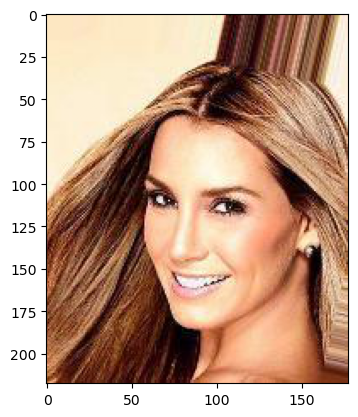

In [ ]:
lengh_dataset, dataset, dataloader = peek_data_set()

if not lengh_dataset == 0:
    image, _ = dataset[0]
    plt.imshow(image.permute(1, 2, 0))
    print(image.size())

torch.Size([128, 3, 218, 178])


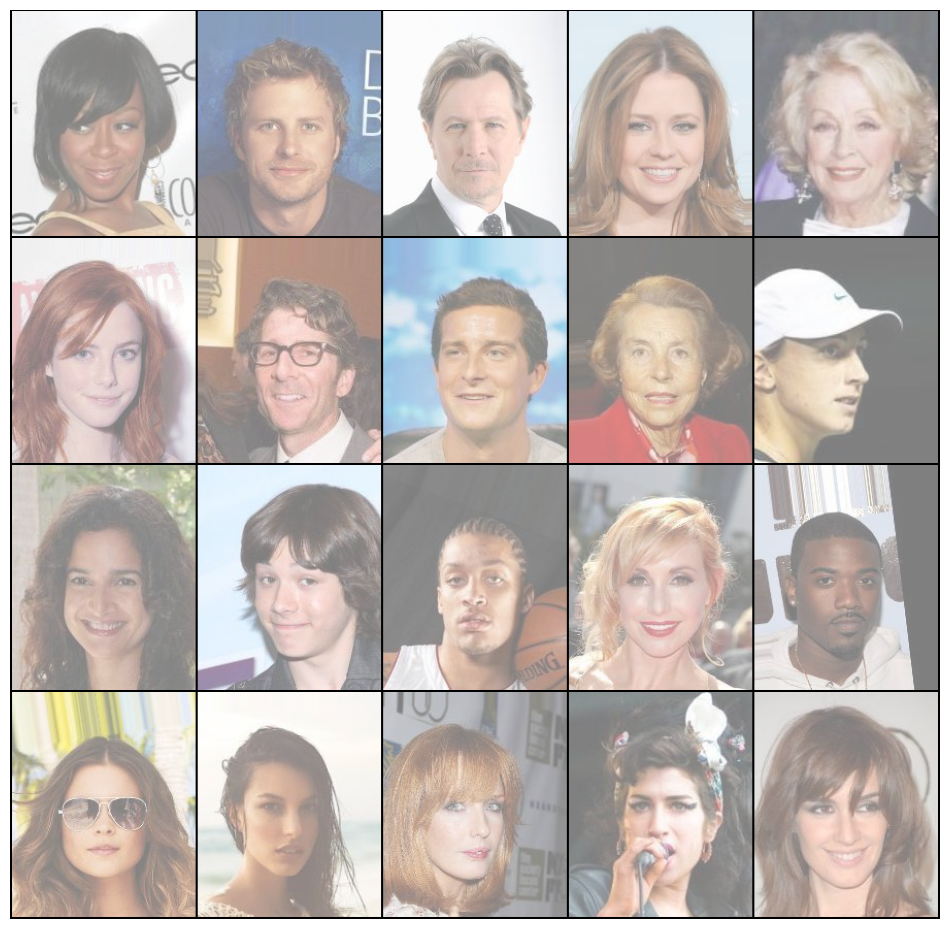

In [9]:
image_size = 64
ms = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))


def denormalized(img):
    return img * ms[1][0] + ms[0][0]


if not lengh_dataset == 0:
    image, _ = next(iter(dataloader))
    print(image.shape)
    plt.figure(figsize=(12, 12))
    plt.axis("off")
    plt.imshow(make_grid(denormalized(image)[:20], nrow=5).permute(1, 2, 0))


# Moving of images from the unzipped folder to train, eval and test folders


In [2]:
# move images to train, eval and test folders if not moved yet, and run following once or run folders_set_up.py
start_move = False

if start_move:
    if __name__ == "__main__":
        from folders_set_up import move_images_to_folders

        move_images_to_folders()


number of training images:  162770
number of evaluations images:  19867
number of testing images:  19630
number of total images:  202267


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image shape torch.Size([3, 128, 128])


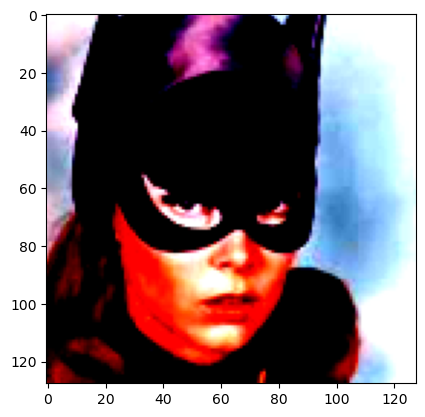

In [3]:
from utils_data_load import get_celeba_datasets

train_loader = get_celeba_datasets()


image, _ = next(iter(train_loader))
image = image[2]

print('image shape', image.shape)

plt.imshow(image.permute(1, 2, 0))

In [3]:
# runs long time, used for testing
def _plot_denormalized_images():
    ms = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

    def denormalized(img):
        return img * ms[1][0] + ms[0][0]

    image_batch, _ = next(iter(train_loader))
    print("image shape", image_batch.shape)
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(make_grid(denormalized(image)[:20], nrow=5).permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image shape torch.Size([32, 3, 128, 128])


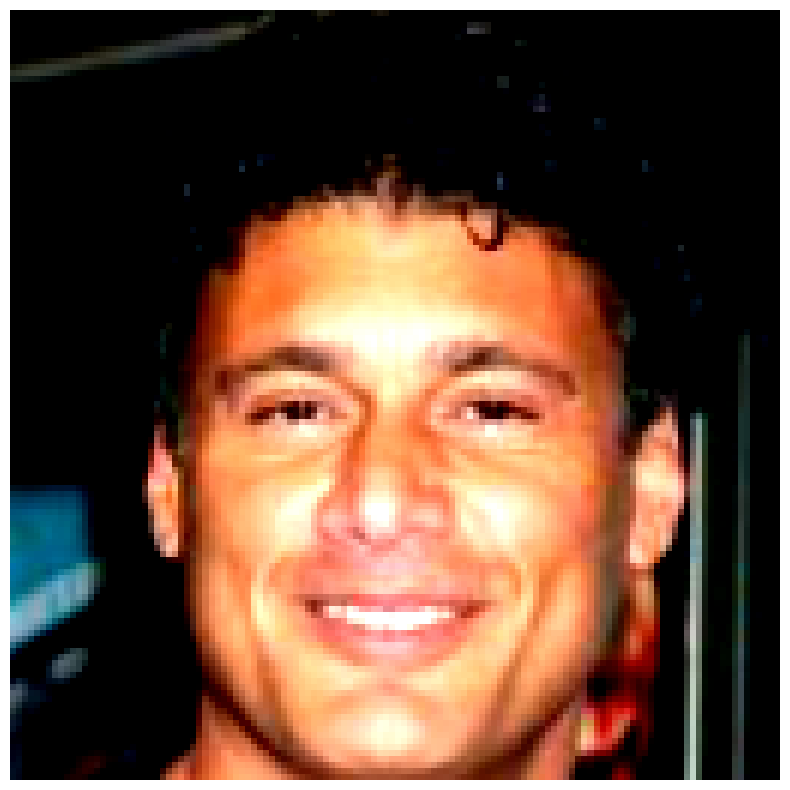

In [4]:
_plot_denormalized_images()

In [ ]:
def deviceLoaderfunc(data, device):
    if isinstance(data, (list, tuple)):
        return [deviceLoaderfunc(x, device) for x in data]

    return data.to(device, non_blocking=True)

In [5]:
# Checking the dataset
print("Training Set:\n")
for images, labels in train_loader:
    print("Image batch dimensions:", images.size())
    print("Image label dimensions:", labels.size())
    print(labels[:10])
    break


Training Set:

Image batch dimensions: torch.Size([32, 3, 128, 128])
Image label dimensions: torch.Size([32])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
targets_code = """Targets are 40-dim vectors representing
                    00 - 5_o_Clock_Shadow
                    01 - Arched_Eyebrows
                    02 - Attractive 
                    03 - Bags_Under_Eyes
                    04 - Bald
                    05 - Bangs
                    06 - Big_Lips
                    07 - Big_Nose
                    08 - Black_Hair
                    09 - Blond_Hair
                    10 - Blurry 
                    11 - Brown_Hair 
                    12 - Bushy_Eyebrows 
                    13 - Chubby 
                    14 - Double_Chin 
                    15 - Eyeglasses 
                    16 - Goatee 
                    17 - Gray_Hair 
                    18 - Heavy_Makeup 
                    19 - High_Cheekbones 
                    20 - Male 
                    21 - Mouth_Slightly_Open 
                    22 - Mustache 
                    23 - Narrow_Eyes 
                    24 - No_Beard 
                    25 - Oval_Face 
                    26 - Pale_Skin 
                    27 - Pointy_Nose 
                    28 - Receding_Hairline 
                    29 - Rosy_Cheeks 
                    30 - Sideburns 
                    31 - Smiling 
                    32 - Straight_Hair 
                    33 - Wavy_Hair 
                    34 - Wearing_Earrings 
                    35 - Wearing_Hat 
                    36 - Wearing_Lipstick 
                    37 - Wearing_Necklace 
                    38 - Wearing_Necktie 
                    39 - Young         
                """